In [1]:
import urllib
import re
import requests
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import random 
import time
from datetime import datetime, date, timedelta

In [2]:
iplist = ['123.169.163.118','34.212.208.46','46.35.249.189','72.35.40.34','114.130.92.14','181.57.198.102','82.146.38.56',
         '212.72.159.22','45.115.175.112','59.152.13.10','139.255.87.234','123.30.155.6','194.213.43.166','180.250.197.188',
         '176.53.2.122','80.249.229.64','52.187.121.7','102.23.237.49','125.26.99.223','151.232.72.15','193.142.219.75',
         '182.71.90.202','124.122.52.57','125.27.251.82','166.148.65.54','193.86.25.225','83.219.1.80','196.22.221.2','196.44.67.172',
         '203.77.239.18','188.120.232.181','190.104.255.9','74.15.191.160','212.126.107.2','96.9.73.80','94.230.158.37','101.51.141.46']

In [3]:
def set_ip():
    # create an opener
    proxy_support = urllib.request.ProxyHandler({'http': iplist[random.randint(0, len(iplist) - 1)]})
    opener = urllib.request.build_opener(proxy_support)

    # create a disguise header
    opener.addheaders = [('User-Agent',
                          'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36')]
    return opener

In [4]:
# requst html
def req_html(opener, url):
    # use opener to request url
    response = opener.open(url)
    # read response and decode it
    html = response.read().decode('utf-8')
#     print(html)
    return html

In [5]:
# set date
def set_date(absolute_minus_day):
    minus_day = -absolute_minus_day
    now_time = datetime.now()
    change_time = now_time + timedelta(days=minus_day)
    return change_time.strftime("%Y-%m-%d") 

In [6]:
# find list
def find_list(html):
    li_ptn = re.compile(r'<li id="sp_nws[0-9]*">(.*?)</li>')
    list = li_ptn.findall(html)
#     for i in list:
#         print(i)
    return list

In [7]:
# find title
def find_title(list):
    tit_ptn = re.compile(r'title="(.*?)">.*?</a></dt>')
    tit = []
    for ll in list:
        tit.append(tit_ptn.findall(ll))
    return tit

In [8]:
# find media
def find_media(list):
    md_ptn = re.compile(r'<span class="_sp_each_source">(\S{,9}\s?\S{,9})<')
    media = []
    for ll in list:
        media.append(md_ptn.findall(ll))
    for i in media:
        print(i)
    return media

In [9]:
# find time
def find_time(list):
    tm_ptn = re.compile(r'<span class="_sp_each_source">.*?</span> <span class="bar"></span> (.*?) <')
    tm = []
    for ll in list:
        tm.append(tm_ptn.findall(ll))
#     for i in tm:
#         print(i)
    return tm

In [10]:
# find newshost
def find_nws_host(list):
    nh_ptn = re.compile(r'class="_sp_each_url" onclick=".*?">(.*?)</a>')
    host = []
    for ll in list:
        host.append(nh_ptn.findall(ll))
#     for i in host:
#         print(i)
    return host

In [11]:
lst = []
title = []
media = []
pblt = []
host = []
continuous = True
i = 0
title_date = str(set_date(0))
while(continuous):
#     2019-01
#     url = 'https://search.naver.com/search.naver?&where=news&query=%EA%B9%80%ED%9D%AC%EC%B2%A0&sm=tab_pge&sort=2&photo=0&field=0&reporter_article=&pd=3&ds=2019.01.01&de=2019.02.01&docid=&nso=so:da,p:from20190101to20190201,a:all&mynews=0&start='+str(i)+'&refresh_start=0'
#     2019-02
#     url = 'https://search.naver.com/search.naver?where=news&query=%EA%B9%80%ED%9D%AC%EC%B2%A0&sm=tab_opt&sort=2&photo=0&field=0&reporter_article=&pd=3&ds=2019.12.01&de=2019.12.31&docid=&nso=so%3Ada%2Cp%3Afrom20191201to20191231%2Ca%3Aall&mynews=0&start='+str(i)+'&refresh_start=0&related=0'
#     url = 'https://search.naver.com/search.naver?where=news&query=%EA%B9%80%ED%9D%AC%EC%B2%A0&sm=tab_opt&sort=2&photo=0&field=0&reporter_article=&pd=3&ds=2019.11.01&de=2019.11.30&docid=&nso=so%3Ada%2Cp%3Afrom20191101to20191130%2Ca%3Aall&mynews=0&start='+str(i)+'&refresh_start=0&related=0'
#     2019-10
    url = 'https://search.naver.com/search.naver?where=news&query=%EA%B9%80%ED%9D%AC%EC%B2%A0&sm=tab_srt&sort=2&photo=0&field=0&reporter_article=&pd=3&ds=2019.12.01&de=2019.12.31&docid=&nso=so%3Ada%2Cp%3Afrom20191201to20191231%2Ca%3Aall&mynews=0&start='+str(i)+'&refresh_start=0&related=0'
    opener = set_ip()
    html = req_html(opener, url)
    fade = find_list(html)
    if len(fade) == 0:
        continuous = False
        break
    
    lst = find_list(html)
    title = title + find_title(lst) 
    media = media + find_media(lst)
    pblt = pblt + find_time(lst)
    host = host + find_nws_host(lst)
    print(str(i)+" "+str(pblt[len(pblt)-1]))
    time.sleep(random.randint(0, 5))
    i = i + 10

['국제신문']
['뉴스엔']
['엑스포츠뉴스']
['OSEN']
['스타뉴스']
['헤럴드POP']
['광주매일신문']
['더셀럽']
['TV리포트']
['미래한국']
0 ['2019.12.01.']
['미래한국']
['베타뉴스']
['한국농어촌방송']
['영남일보']
['한스경제']
['빅데이터뉴스']
['싱글리스트']
['국제뉴스']
['한국일보']
['노컷뉴스']
10 ['2019.12.01.']
['브릿지경제']
['세계일보']
['디지털타임스']
['이데일리']
['서울경제']
['내외경제tv']
['MBN']
['MK스포츠']
['제주신보']
['브레이크뉴스']
20 ['2019.12.01.']
['매일경제']
['말산업저널']
['경향신문']
['마이데일리']
['SBS funE']
['인천일보']
['한국스포츠통신']
['텐아시아']
['헤럴드경제']
['국제뉴스']
30 ['2019.12.02.']
['톱데일리']
['서울신문']
['CNB뉴스']
['IT조선']
['뉴스엔']
['국제뉴스']
['헤럴드경제']
['헤럴드POP']
['조선비즈']
['내일신문']
40 ['2019.12.02.']
['톱스타뉴스']
['국제뉴스']
['국제뉴스']
['크리스천투데이']
['엑스포츠뉴스']
['뉴스투데이']
['CNB뉴스']
['지피코리아']
['디지틀조선일보']
['서울경제']
50 ['<span class="newspaper">12면']
['서울경제']
['뉴스1']
['이데일리']
['이데일리']
['연합뉴스']
['뉴시스']
['비즈니스포스트']
['아시아경제']
['뉴스프리존']
['헤럴드경제']
60 ['2019.12.03.']
['업코리아']
['국제뉴스']
['서울신문']
['중부일보']
['중부매일']
['파이낸셜뉴스']
['뉴스엔']
['뉴스타운']
['뉴스엔']
['뉴스엔']
70 ['2019.12.03.']
['뉴스엔']
['뉴스엔']
['비욘드포스트']
['포쓰저널']
['아시아투데이']
['아시아투데이']
['아시아투데이'

['한국스포츠통신']
['뉴스엔']
['뉴스엔']
['매일뉴스']
['뉴스1']
['스타뉴스']
['엑스포츠뉴스']
['헤럴드POP']
['OSEN']
['인천일보']
710 ['2019.12.08.']
['뉴스투데이']
['뉴스엔']
['OSEN']
['마이데일리']
['enews24']
['스포츠동아']
['공감신문']
['헤럴드POP']
['조이뉴스24']
['폴리뉴스']
720 ['2019.12.08.']
['스타뉴스']
['MBN']
['금강일보']
['국제뉴스']
['스포츠월드']
['더드라이브']
['비즈엔터']
['TV리포트']
['MK스포츠']
['비즈엔터']
730 ['2019.12.08.']
['일간스포츠']
['머니투데이']
['경기일보']
['스포츠한국']
['인사이트']
['스포츠동아']
['한국경제']
['일간스포츠']
['매일경제']
['MTN']
740 ['2019.12.08.']
['폴리뉴스']
['아시아경제']
['업코리아']
['말산업저널']
['한스경제']
['아시아경제']
['매일경제']
['아이뉴스24']
['뉴시스']
['국제뉴스']
750 ['2019.12.09.']
['데일리안']
['매일일보']
['헤럴드경제']
['머니S']
['농업경제신문']
['EBN']
['브릿지경제']
['뉴스토마토']
['프라임경제']
['머니투데이']
760 ['2019.12.09.']
['이투데이']
['메트로신문']
['아시아투데이']
['미디어펜']
['뉴스웨이']
['디지털타임스']
['녹색경제신문']
['시사저널이코노미']
['서울파이낸스']
['아시아타임즈']
770 ['2019.12.09.']
['엑스포츠뉴스']
['뉴스1']
['국제뉴스']
['한국경제TV']
['헤럴드POP']
['국제뉴스']
['에이블뉴스']
['톱스타뉴스']
['투데이에너지']
['ZDNet Korea']
780 ['2019.12.09.']
['전기신문']
['국제뉴스']
['인더스트리뉴스']
['조세금융신문']
['서울경제']
['스포츠서울']


['MTN']
['뉴스웨이']
['국제뉴스']
['한국일보']
['톱스타뉴스']
['인천일보']
['국제뉴스']
['아시아투데이']
['시민일보']
['경북일보']
1410 ['2019.12.19.']
['국제뉴스']
['스포츠조선']
['헤럴드POP']
['텐아시아']
['국제뉴스']
['싱글리스트']
['OSEN']
['SBS funE']
['스포츠경향']
['매일경제']
1420 ['2019.12.19.']
['티브이데일리']
['폴리뉴스']
['전북일보']
['국제뉴스']
['더셀럽']
['톱데일리']
['국제뉴스']
['경상일보']
['헤럴드POP']
['엑스포츠뉴스']
1430 ['2019.12.19.']
['뉴스투데이']
['MK스포츠']
['스포츠동아']
['스타데일리뉴스']
['연합뉴스']
['CNB뉴스']
['내외경제tv']
['톱스타뉴스']
['이코노믹리뷰']
['제주신보']
1440 ['2019.12.19.']
['톱스타뉴스']
['부산일보']
['공감신문']
['중부일보']
['서울신문']
['경인일보']
['비즈엔터']
['MK스포츠']
['MBN']
['티브이데일리']
1450 ['2019.12.19.']
['엑스포츠뉴스']
['OSEN']
['MK스포츠']
['뉴스엔']
['티브이데일리']
['MK스포츠']
['헤럴드POP']
['SBS funE']
['스포츠투데이']
['SBS funE']
1460 ['2019.12.19.']
['OSEN']
['한국경제']
['헤럴드POP']
['TV리포트']
['매일경제']
['엑스포츠뉴스']
['OSEN']
['스포츠조선']
['공감신문']
['비즈엔터']
1470 ['2019.12.19.']
['SBS funE']
['경인일보']
['데일리한국']
['마이데일리']
['마이데일리']
['마이데일리']
['뉴스엔']
['엑스포츠뉴스']
['헤럴드POP']
['스포츠투데이']
1480 ['2019.12.20.']
['OSEN']
['티브이데일리']
['TBC대구방송']
['OSEN']
['뉴스

['서울경제']
['서울경제']
['위키트리']
['서울경제']
['스포츠조선']
['조이뉴스24']
['충청리뷰']
['일요서울']
['일요서울']
['일요서울']
2130 ['5일 전']
['일요서울']
['일요서울']
['일요서울']
['일요서울']
['일요서울']
['일요서울']
['일요서울']
['일요서울']
['일요서울']
['일요서울']
2140 ['5일 전']
['일요서울']
['일요서울']
['일요서울']
['일요서울']
['한국경제TV']
['일요서울']
['전북중앙']
['부산일보']
['위키트리']
['CBC뉴스']
2150 ['5일 전']
['톱스타뉴스']
['톱스타뉴스']
['톱스타뉴스']
['톱스타뉴스']
['MTN']
['더셀럽']
['SBS funE']
['OSEN']
['엑스포츠뉴스']
['매일경제']
2160 ['5일 전']
['헤럴드POP']
['뉴스1']
['뷰어스']
['이투데이']
['마이데일리']
['조이뉴스24']
['중도일보']
['녹색경제신문']
['리서치페이퍼']
['뉴스엔']
2170 ['5일 전']
['OSEN']
['OSEN']
['뉴스엔']
['스포츠동아']
['스포츠조선']
['마이데일리']
['아주경제']
['싱글리스트']
['텐아시아']
['OSEN']
2180 ['5일 전']
['스포티비뉴스']
['매일경제']
['엑스포츠뉴스']
['스포츠경향']
['베리타스알파']
['스타데일리뉴스']
['스포츠서울']
['위키트리']
['이데일리']
['서울경제']
2190 ['5일 전']
['스포츠경향']
['CNB저널']
['톱스타뉴스']
['국제뉴스']
['스포츠투데이']
['이데일리']
['티브이데일리']
['MK스포츠']
['스타뉴스']
['세계일보']
2200 ['5일 전']
['조이뉴스24']
['매일경제']
['스포츠투데이']
['SBS funE']
['국제뉴스']
['티브이데일리']
['엑스포츠뉴스']
['머니투데이']
['일간리더스경제']
['뉴스엔']
2210 ['5일 전']
['YTN']

In [12]:

np.set_printoptions(threshold=np.inf)
title = pd.DataFrame(title, columns=['title'])
media = pd.DataFrame(media, columns=['media'])
pblt = pd.DataFrame(pblt, columns=['time'])
host = pd.DataFrame(host, columns=['host'])
tot = pd.concat([title, media, pblt, host], axis=1)
print(tot)
print(tot.shape)
tot.to_csv(title_date+".csv", sep=',', index=True, header=True)


                                                  title   media         time  \
0                        ‘아는 형님’ 박진영 트와이스 나연 다현 어색달콤 케미    국제신문  2019.12.01.   
1           박진영 잡는 다현X나연, JYP 예능 3인방 환상 호흡 ‘아는형님’[어제TV]     뉴스엔  2019.12.01.   
2     &#39;아는형님&#39; 박진영 최초 고백 &quot;선천적 왼쪽 뇌 경동맥 없다...  엑스포츠뉴스  2019.12.01.   
3     &#39;아는형님&#39; 이상민 &quot;박지윤에게 박진영 추천했다&quot; ...    OSEN  2019.12.01.   
4              박진영 &quot;왼쪽 뇌 경동맥 없다..기형인 줄 처음 알아&quot;    스타뉴스  2019.12.01.   
...                                                 ...     ...          ...   
2398  [HI★초점] 막 내린 지상파 ‘2019 연예대상’, 어떠셨나요? (ft. ‘MVP...    한국일보         3일 전   
2399  &#39;라디오스타&#39; 김소현, &quot;우린 끝났구나&quot; 손준호 의...  한국경제TV         3일 전   
2400  ‘라디오스타’ 김희철, 영웅 ‘페이커’ 실물 영접에 ‘샤이 가이’ 등극…&quot;...   브릿지경제         3일 전   
2401           &#39;치아 교정러&#39;들은 폭풍 공감했다는 닭 뜯는 김희철의 비애    인사이트         3일 전   
2402  김희철 &quot;결혼을 하던 연예인을 그만두던 감사한 마음 평생 갖고 은혜 갚을 ...  데일리포스트         3일 전   

       host  
0      None  
1     네이버뉴스

In [13]:
joined_title = ' '.join(list(tot["title"]))
joined_title = joined_title.replace("quot;", "")
joined_title = joined_title.replace("&#39;", "")

(-0.5, 15999.5, 7999.5, -0.5)

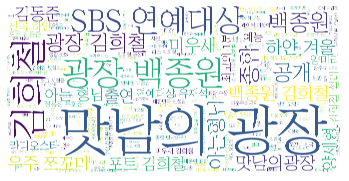

In [14]:
from wordcloud import WordCloud
wordcloud = WordCloud(font_path="ChosunM.ttf",margin=1,scale=40,background_color="white",mode="RGBA").generate(joined_title)

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [15]:
plt.show()
wordcloud.to_file(title_date+".png")

In [3]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

jan = pd.read_csv("2019-01.csv", index_col=0)
feb = pd.read_csv("2019-02.csv", index_col=0)
mar = pd.read_csv("2019-03.csv", index_col=0)
apr = pd.read_csv("2019-04.csv", index_col=0)
may = pd.read_csv("2019-05.csv", index_col=0)
jun = pd.read_csv("2019-06.csv", index_col=0)
jul = pd.read_csv("2019-07.csv", index_col=0)
aug = pd.read_csv("2019-08.csv", index_col=0)
sep = pd.read_csv("2019-09.csv", index_col=0)
oto = pd.read_csv("2019-10.csv", index_col=0)
nov = pd.read_csv("2019-11.csv", index_col=0)
dec = pd.read_csv("2019-12.csv", index_col=0)

In [10]:
tot = pd.concat([jan, feb, mar, apr, jun, jul, aug, sep, oto, nov, dec])

In [11]:
tot = ' '.join(list(tot["title"]))
tot = tot.replace("quot;", "")
tot = tot.replace("&#39;", "")

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(font_path="ChosunM.ttf",margin=1,scale=40,background_color="white",mode="RGBA").generate(tot)

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 15999.5, 7999.5, -0.5)